install & import library

In [ ]:
!pip install ultralytics scikit-learn matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.9 MB/s eta 0:00:00


In [2]:
import os
from os import path
import shutil
import json
import cv2
from collections import Counter
from itertools import product
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import seaborn as sns
from ultralytics import YOLO
import pandas as pd
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


link to google drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
SRC_DIR = "/content/drive/MyDrive/yolo_dataset"

In [ ]:
# SRC_DIR = "/content/drive/MyDrive/dentalai-DatasetNinja"
# DEST_DIR = "/content/drive/MyDrive/yolo_dataset"

In [ ]:
os.listdir(SRC_DIR)

['data.yaml', 'test', 'train', 'val']

In [ ]:
# os.makedirs(path.join(DEST_DIR, "train", "images"), exist_ok=True)
# os.makedirs(path.join(DEST_DIR, "train", "labels"), exist_ok=True)
# os.makedirs(path.join(DEST_DIR, "val", "images"), exist_ok=True)
# os.makedirs(path.join(DEST_DIR, "val", "labels"), exist_ok=True)
# os.makedirs(path.join(DEST_DIR, "test", "images"), exist_ok=True)
# os.makedirs(path.join(DEST_DIR, "test", "labels"), exist_ok=True)

In [ ]:
# meta = json.load(open(path.join(SRC_DIR,"meta.json")))
# classes = {}
# for (index, entry) in enumerate(meta["classes"]):
#     classes[entry["title"]] = index
# classes

In [ ]:
# with open(path.join(DEST_DIR,"data.yaml"),"w") as fp:
#     fp.write("train: /content/drive/MyDrive/yolo_dataset/train\n")
#     fp.write("val: /content/drive/MyDrive/yolo_dataset/val\n")
#     fp.write("test: /content/drive/MyDrive/yolo_dataset/test\n")
#     fp.write("\n")
#     fp.write("nc: {}\n".format(len(classes)))
#     fp.write("names: ['{}']".format("','".join(classes.keys())))

In [ ]:
dirs_map = {"train": "train", "valid": "val", "test":"test"}

In [ ]:
# points = []
# for (src_dir, dest_dir) in dirs_map.items():
#     shutil.copytree(path.join(SRC_DIR,src_dir,"img"),path.join(DEST_DIR,dest_dir,"images"),dirs_exist_ok=True)
#     for file in os.listdir(path.join(SRC_DIR,src_dir,"ann")):
#         ann = json.load(open(path.join(SRC_DIR,src_dir,"ann",file),"r"))
#         img_width = ann["size"]["width"]
#         img_height = ann["size"]["height"]
#         file_name = file.replace(".jpg.json",".txt")
#         fp = open(path.join(DEST_DIR,dest_dir,"labels",file_name),"w")
#         for obj in ann["objects"]:
#             class_id = classes[obj["classTitle"]]
#             top = 999999
#             left = 999999
#             bottom = 0
#             right = 0
#             for point in obj["points"]["exterior"]:
#                 if point[0]<left:
#                     left = point[0]
#                 if point[0]>right:
#                     right = point[0]
#                 if point[1]<top:
#                     top = point[1]
#                 if point[1]>bottom:
#                     bottom = point[1]
#                 width = right - left
#                 height = bottom - top
#                 x_center = (left+width/2)/img_width
#                 y_center =(top+height/2)/img_height
#                 width /= img_width
#                 height /= img_height
#             fp.write("{} {} {} {} {}\n".format(class_id,x_center,y_center,width,height))
#         fp.close()

**Dataset**

In [ ]:
from collections import defaultdict

labels_path = "/content/drive/MyDrive/yolo_dataset/train/labels"
class_image_count = defaultdict(set)

for label_file in os.listdir(labels_path):
    if not label_file.endswith(".txt"):
        continue
    with open(os.path.join(labels_path, label_file), "r") as f:
        lines = f.readlines()
        for line in lines:
            class_id = int(line.strip().split()[0])
            class_image_count[class_id].add(label_file)

class_counts = {class_id: len(imgs) for class_id, imgs in class_image_count.items()}

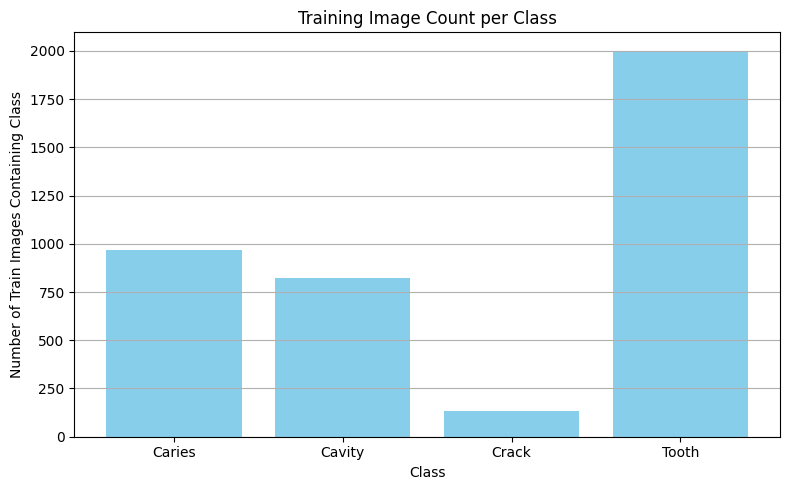

In [ ]:
class_names = {0: 'Caries', 1: 'Cavity', 2: 'Crack', 3: 'Tooth'}  # adjust as needed

sorted_ids = sorted(class_counts.keys())
labels = [class_names.get(i, str(i)) for i in sorted_ids]
counts = [class_counts[i] for i in sorted_ids]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color='skyblue')
plt.xlabel("Class")
plt.ylabel("Number of Train Images Containing Class")
plt.title("Training Image Count per Class")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Train**

In [ ]:
# parmaters
lr0_values = [0.005, 0.001]
weight_decay_values = [0.0001, 0.0005]
optimizers = ['Adam']
batches = [30]

In [ ]:
model = YOLO("yolov8m.pt")
best_result = None
best_model = None
model.train(
  data="/content/drive/MyDrive/yolo_dataset/data.yaml",
  model="yolov8m.pt",
  epochs=30,
  batch=16,
  lr0 = 0.003,
  weight_decay = 0.0001,
  optimizer = optimizers[0],
  imgsz=640,
  hsv_h=0.02,
  hsv_s=0.6,
  hsv_v=0.5,
  augment=True
)

100%|██████████| 49.7M/49.7M [00:00<00:00, 225MB/s]


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.02, hsv_s=0.6, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.003, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

100%|██████████| 755k/755k [00:00<00:00, 28.2MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192,

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.6±0.8 MB/s, size: 281.1 KB)


train: Scanning /content/drive/MyDrive/yolo_dataset/train/labels.cache... 1991 images, 18 backgrounds, 0 corrupt: 100%|██████████| 2009/2009 [00:00<?, ?it/s]

train: /content/drive/MyDrive/yolo_dataset/train/images/804_jpg.rf.d6fb1371223a94b6caaaab80cd7aaac7.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 0.7±0.7 MB/s, size: 379.2 KB)


val: Scanning /content/drive/MyDrive/yolo_dataset/val/labels.cache... 254 images, 0 backgrounds, 0 corrupt: 100%|██████████| 254/254 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.003, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0001), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.14G     0.9055      1.046      1.089        152        640: 100%|██████████| 126/126 [12:45<00:00,  6.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]

                   all        254       3156      0.213      0.268      0.233      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.41G     0.9283       0.81      1.111        150        640: 100%|██████████| 126/126 [01:45<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.25s/it]

                   all        254       3156      0.325      0.252      0.251      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.33G     0.9192     0.7717      1.106        184        640: 100%|██████████| 126/126 [01:43<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]

                   all        254       3156      0.508      0.322      0.291      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.33G     0.8841     0.7207      1.084        156        640: 100%|██████████| 126/126 [01:43<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        254       3156      0.429      0.331      0.312      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.36G     0.8655     0.7035      1.077        145        640: 100%|██████████| 126/126 [01:41<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]

                   all        254       3156      0.308      0.337      0.304      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.37G     0.8448      0.671      1.071        124        640: 100%|██████████| 126/126 [01:43<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        254       3156      0.437      0.341      0.341      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.43G     0.8337     0.6582      1.062        140        640: 100%|██████████| 126/126 [01:39<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]

                   all        254       3156       0.42      0.359      0.353      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.35G     0.8075     0.6266      1.049        213        640: 100%|██████████| 126/126 [01:41<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        254       3156      0.444      0.369      0.346      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       6.2G     0.7988     0.6151      1.043        103        640: 100%|██████████| 126/126 [01:39<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        254       3156      0.486      0.407      0.353      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.36G     0.7881     0.5972      1.035        226        640: 100%|██████████| 126/126 [01:41<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        254       3156       0.44      0.381      0.369      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.37G     0.7818     0.5962      1.033        211        640: 100%|██████████| 126/126 [01:41<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        254       3156      0.448      0.409      0.373      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.18G     0.7694     0.5799      1.025        183        640: 100%|██████████| 126/126 [01:45<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        254       3156      0.474       0.43      0.398      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.18G     0.7555     0.5712      1.021        197        640: 100%|██████████| 126/126 [01:41<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        254       3156      0.554      0.386      0.384      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.37G     0.7509     0.5671       1.02        173        640: 100%|██████████| 126/126 [01:42<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        254       3156       0.49      0.392      0.395      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.43G     0.7481     0.5611      1.016        161        640: 100%|██████████| 126/126 [01:41<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        254       3156      0.453      0.404      0.411      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.43G     0.7343     0.5465      1.011        183        640: 100%|██████████| 126/126 [01:39<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]

                   all        254       3156      0.527       0.41      0.405      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.36G     0.7269     0.5369      1.002        171        640: 100%|██████████| 126/126 [01:42<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]

                   all        254       3156      0.572      0.398       0.41      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.35G     0.7198     0.5327      1.001        154        640: 100%|██████████| 126/126 [01:41<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]

                   all        254       3156      0.496       0.41      0.413      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.36G     0.7087     0.5177     0.9987        181        640: 100%|██████████| 126/126 [01:41<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]

                   all        254       3156       0.49      0.459      0.428      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.34G     0.7075     0.5082     0.9979        197        640: 100%|██████████| 126/126 [01:38<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]

                   all        254       3156      0.459      0.464      0.417      0.292


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      6.45G     0.6858     0.5053     0.9744         98        640: 100%|██████████| 126/126 [01:44<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]

                   all        254       3156      0.616      0.454      0.424      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      6.36G     0.6811     0.4942     0.9737        131        640: 100%|██████████| 126/126 [02:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]

                   all        254       3156      0.525      0.411      0.421      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      6.37G     0.6699     0.4796     0.9696         89        640: 100%|██████████| 126/126 [01:37<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        254       3156      0.531       0.41      0.426      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.44G     0.6582     0.4747     0.9714        125        640: 100%|██████████| 126/126 [01:40<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        254       3156      0.555       0.45      0.443      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      6.47G     0.6521     0.4612     0.9632        107        640: 100%|██████████| 126/126 [01:37<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        254       3156      0.572      0.429      0.442      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      6.48G     0.6458      0.449     0.9597        105        640: 100%|██████████| 126/126 [01:39<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        254       3156      0.624      0.423      0.455      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      6.47G     0.6379     0.4423     0.9555         72        640: 100%|██████████| 126/126 [01:40<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        254       3156      0.451      0.476      0.458      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      6.48G     0.6263     0.4293     0.9474         77        640: 100%|██████████| 126/126 [01:35<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]

                   all        254       3156      0.522      0.465      0.457      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      6.45G     0.6178     0.4231     0.9399        114        640: 100%|██████████| 126/126 [01:36<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        254       3156      0.596      0.428      0.457      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      6.46G     0.6086     0.4108     0.9347         61        640: 100%|██████████| 126/126 [01:40<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all        254       3156      0.585      0.468      0.481      0.336



30 epochs completed in 1.129 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.31s/it]


                   all        254       3156      0.485      0.483      0.459      0.329
                Caries        102        328      0.388      0.287      0.261      0.118
                Cavity         85        159      0.356      0.415      0.372       0.19
                 Crack         12         16      0.382       0.25      0.229      0.152
                 Tooth        254       2653      0.817      0.982      0.974      0.855
Speed: 0.2ms preprocess, 22.0ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab46d455b10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
!cp -r /content/runs /content/drive/MyDrive/finally_modele/

**Plots For Training Phase**

*Loss*

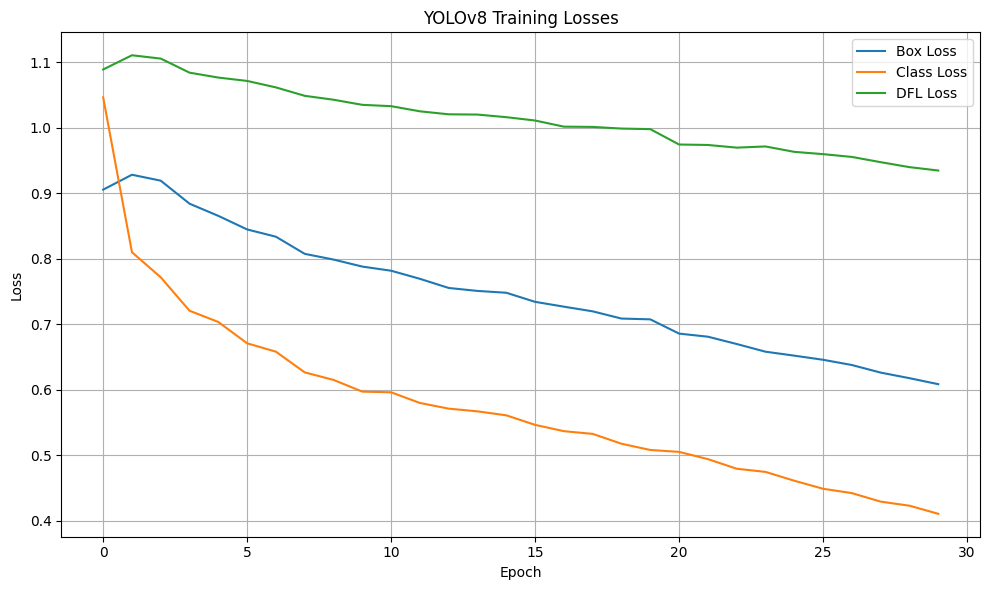

In [ ]:
log_path = "./runs/detect/train/results.csv"
df = pd.read_csv(log_path)

plt.figure(figsize=(10, 6))
plt.plot(df["train/box_loss"], label="Box Loss")
plt.plot(df["train/cls_loss"], label="Class Loss")
plt.plot(df["train/dfl_loss"], label="DFL Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("YOLOv8 Training Losses")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

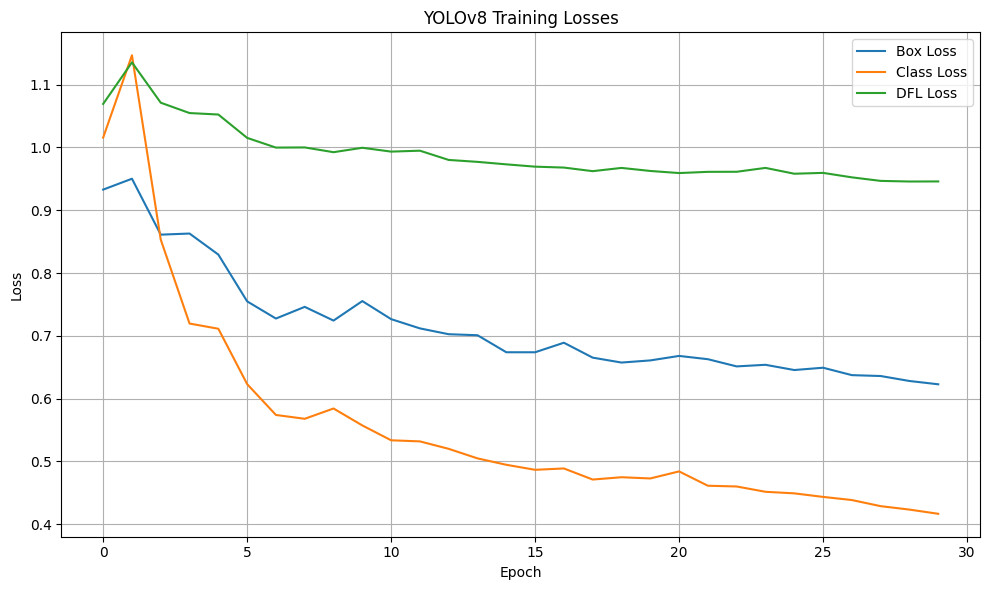

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df["val/box_loss"], label="Box Loss")
plt.plot(df["val/cls_loss"], label="Class Loss")
plt.plot(df["val/dfl_loss"], label="DFL Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("YOLOv8 validation Losses")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*Validation*

In [ ]:
df['metrics/mAP50-95(B)']

,metrics/mAP50-95(B)
0,0.16855
1,0.17171
2,0.19857
3,0.21386
4,0.21897
5,0.24760
6,0.24879
7,0.24325
8,0.25480
9,0.26260


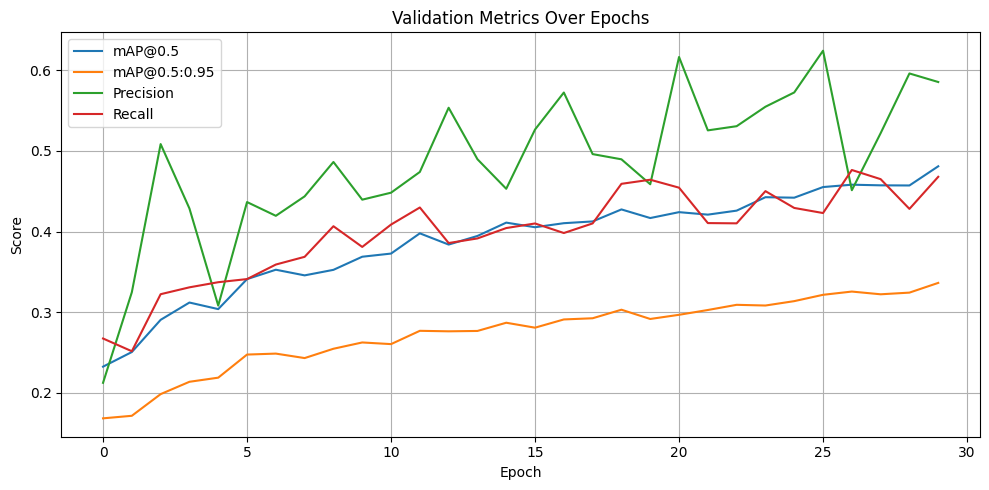

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.plot(df['metrics/precision(B)'], label='Precision')
plt.plot(df['metrics/recall(B)'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation Metrics Over Epochs')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

*Epoch vs Time Analysis*

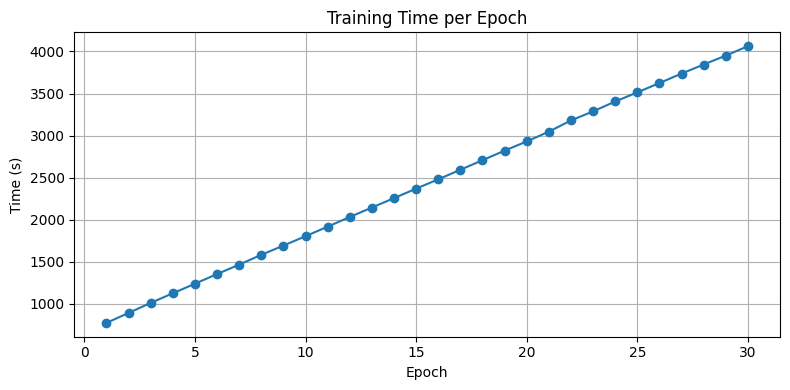

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df['epoch'], df['time'], marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Time (s)')
plt.title('Training Time per Epoch')
plt.grid()
plt.tight_layout()
plt.show()

*Learning Rate Schedulers*

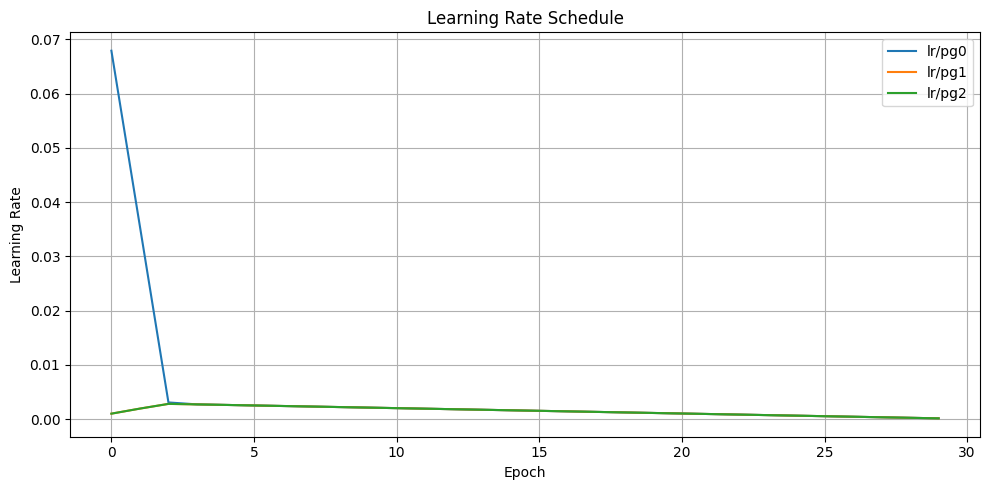

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['lr/pg0'], label='lr/pg0')
plt.plot(df['lr/pg1'], label='lr/pg1')
plt.plot(df['lr/pg2'], label='lr/pg2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

*Precision and Recall*

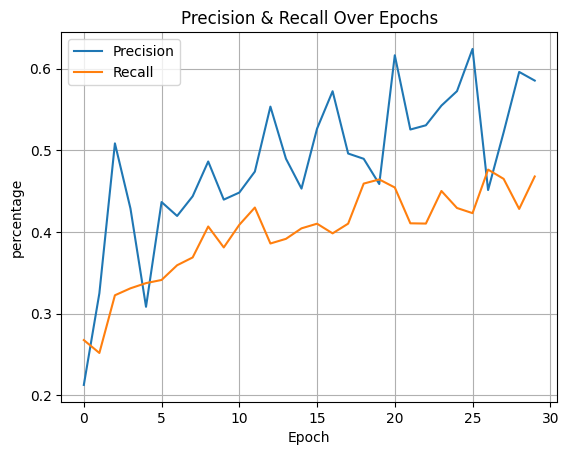

In [ ]:
plt.plot(df["metrics/precision(B)"], label="Precision")
plt.plot(df["metrics/recall(B)"], label="Recall")
plt.xlabel("Epoch")
plt.ylabel("percentage")
plt.title("Precision & Recall Over Epochs")
plt.legend()
plt.grid()

**Test Phase**

In [ ]:
model.val(data="/content/drive/MyDrive/yolo_dataset/data.yaml", split='val', save_conf=True, conf=0.5)

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.9±1.4 ms, read: 59.9±95.0 MB/s, size: 656.8 KB)


val: Scanning /content/drive/MyDrive/yolo_dataset/val/labels.cache... 254 images, 0 backgrounds, 0 corrupt: 100%|██████████| 254/254 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:21<00:00,  1.36s/it]


                   all        254       3156      0.728      0.358      0.557      0.439
                Caries        102        328      0.698      0.113      0.402      0.227
                Cavity         85        159      0.644      0.239      0.446      0.264
                 Crack         12         16      0.667      0.125      0.417      0.397
                 Tooth        254       2653      0.902      0.954      0.961      0.868
Speed: 2.4ms preprocess, 46.3ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab46d11d450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

*Confusion Matrix*

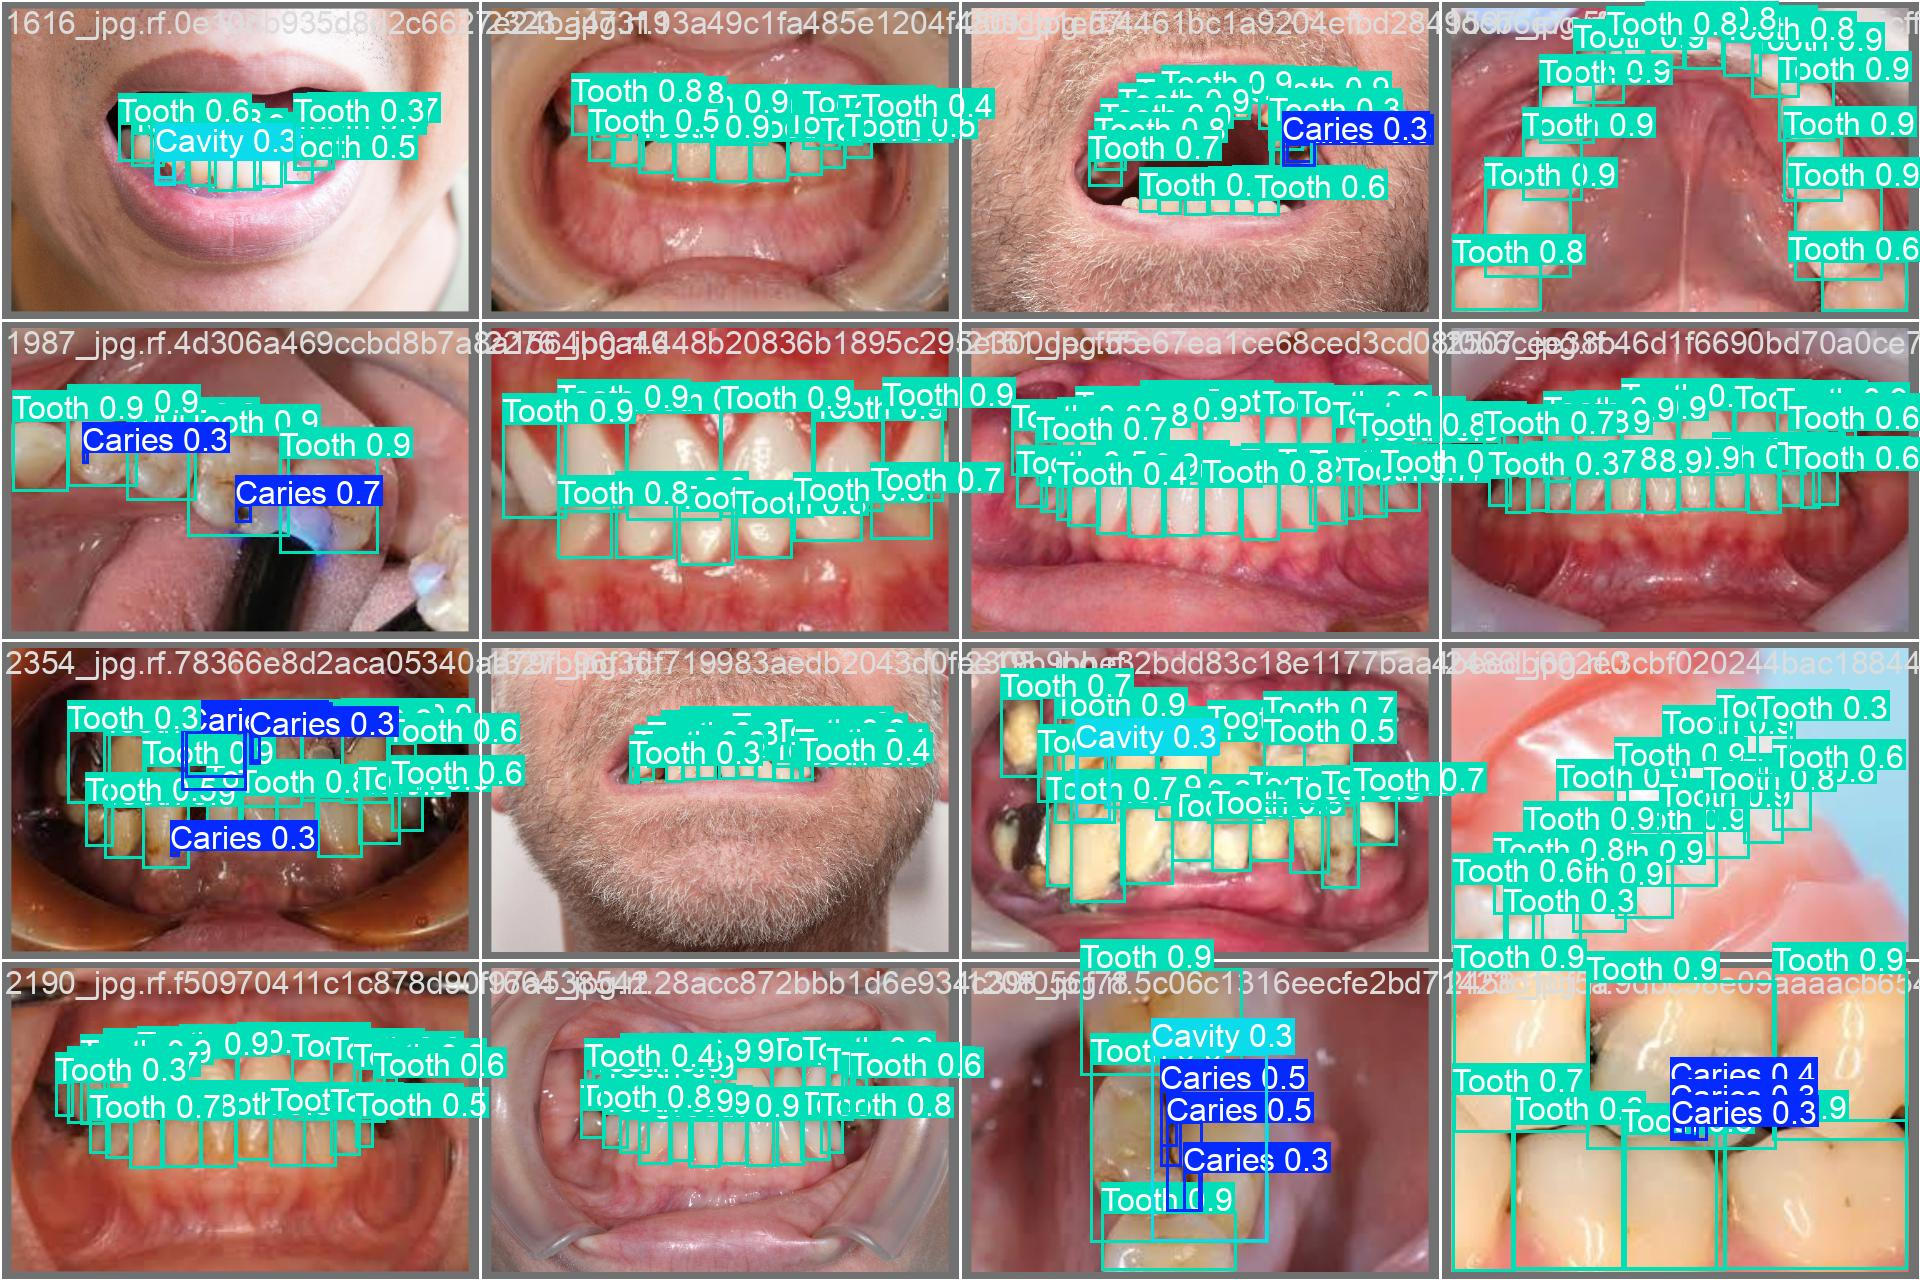

In [ ]:
Image("/content/runs/detect/train/val_batch2_pred.jpg")

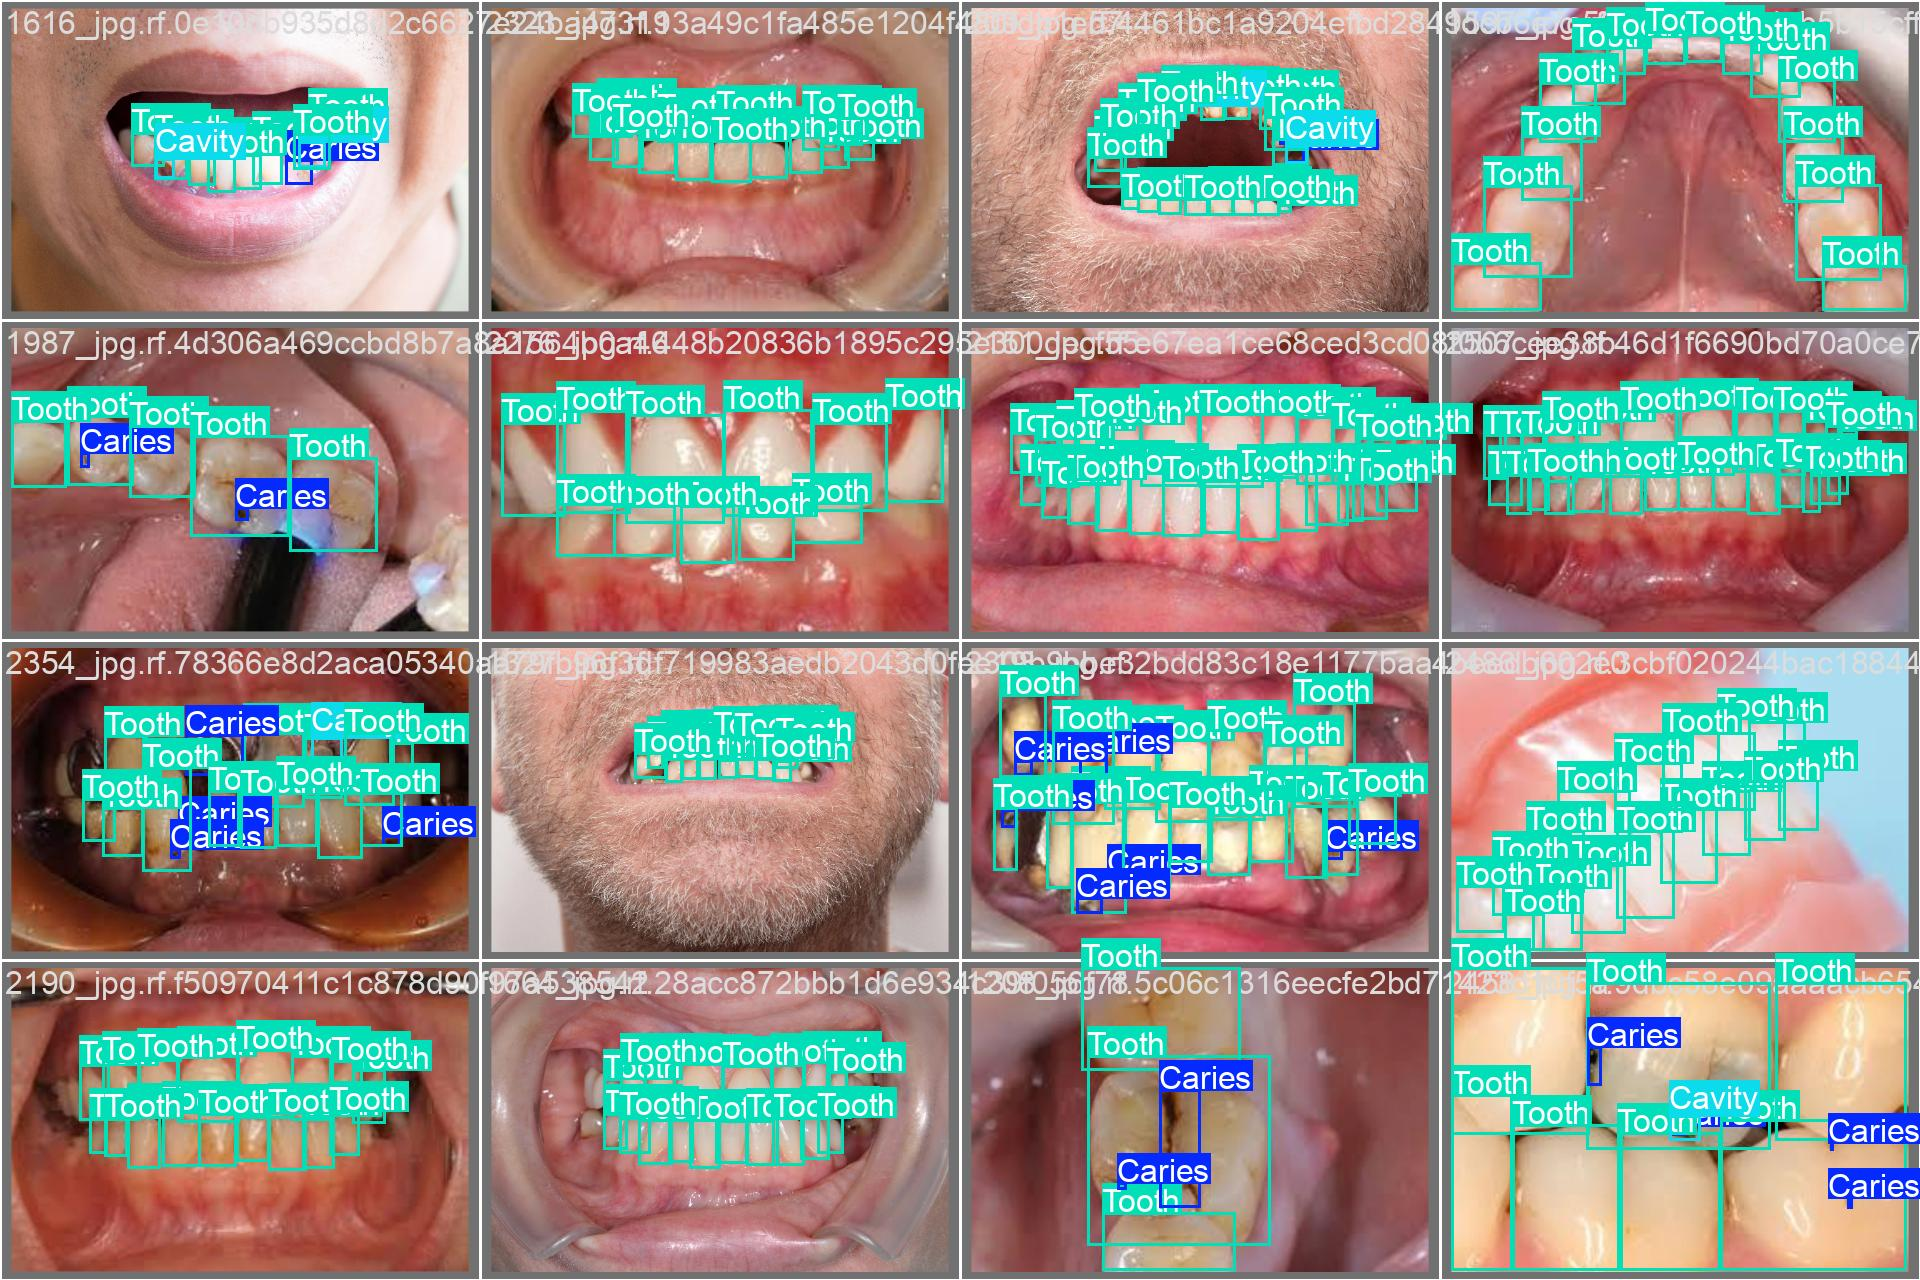

In [ ]:
Image("/content/runs/detect/train/val_batch2_labels.jpg")

*P and R Curves*

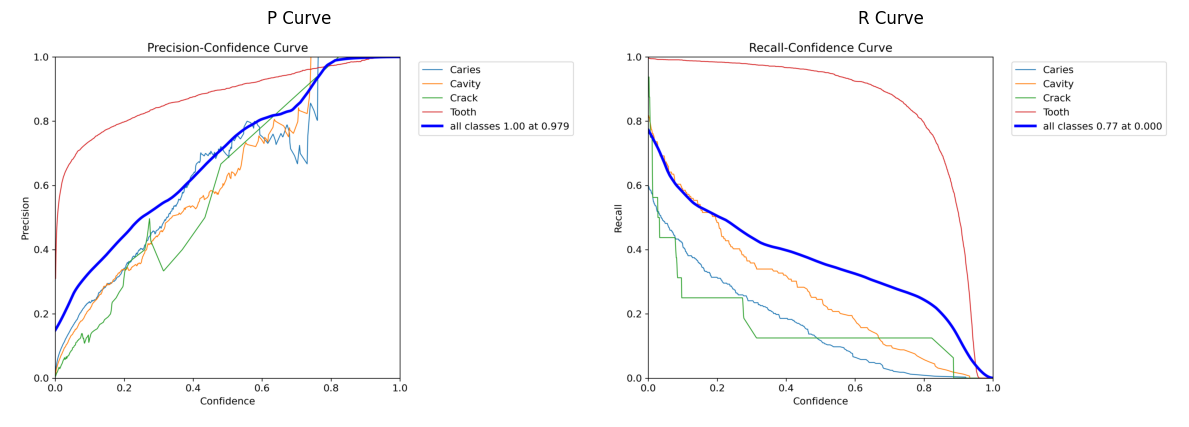

In [ ]:
from IPython.display import Image
img1 = cv2.cvtColor(cv2.imread('/content/runs/detect/train/BoxP_curve.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('/content/runs/detect/train/BoxR_curve.png'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("P Curve")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("R Curve")
plt.axis('off')

plt.tight_layout()
plt.show()

**Model's Output VS Real Answer**

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/finally_modele/runs/detect/train/weights/best.pt')

img_path = '/content/drive/MyDrive/yolo_dataset/test/images/1189_jpg.rf.7329e9697a53eef9ae3e7c59067e50a8.jpg'

img_raw = Image.open(img_path).convert("RGB")
results_raw = model(img_raw, conf=0.5)


0: 448x640 4 Tooths, 2086.0ms
Speed: 4.5ms preprocess, 2086.0ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


In [17]:
img_cv2 = cv2.imread(img_path)
img_resized = cv2.resize(img_cv2, (520, 520))
img_enhanced = cv2.convertScaleAbs(img_resized, alpha=1.2, beta=10)
img_normalized = img_enhanced.astype(np.float32) / 255.0
cv2.imwrite('/content/processed_image.jpg', img_normalized * 255)

results_preprocessed = model('/content/processed_image.jpg', conf=0.5)


image 1/1 /content/processed_image.jpg: 640x640 1 Caries, 4 Tooths, 3640.0ms
Speed: 5.7ms preprocess, 3640.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


In [18]:
img_raw_cv2 = cv2.cvtColor(np.array(img_raw), cv2.COLOR_RGB2BGR)
img_pred_raw = results_raw[0].plot()
img_pred_pre = results_preprocessed[0].plot()

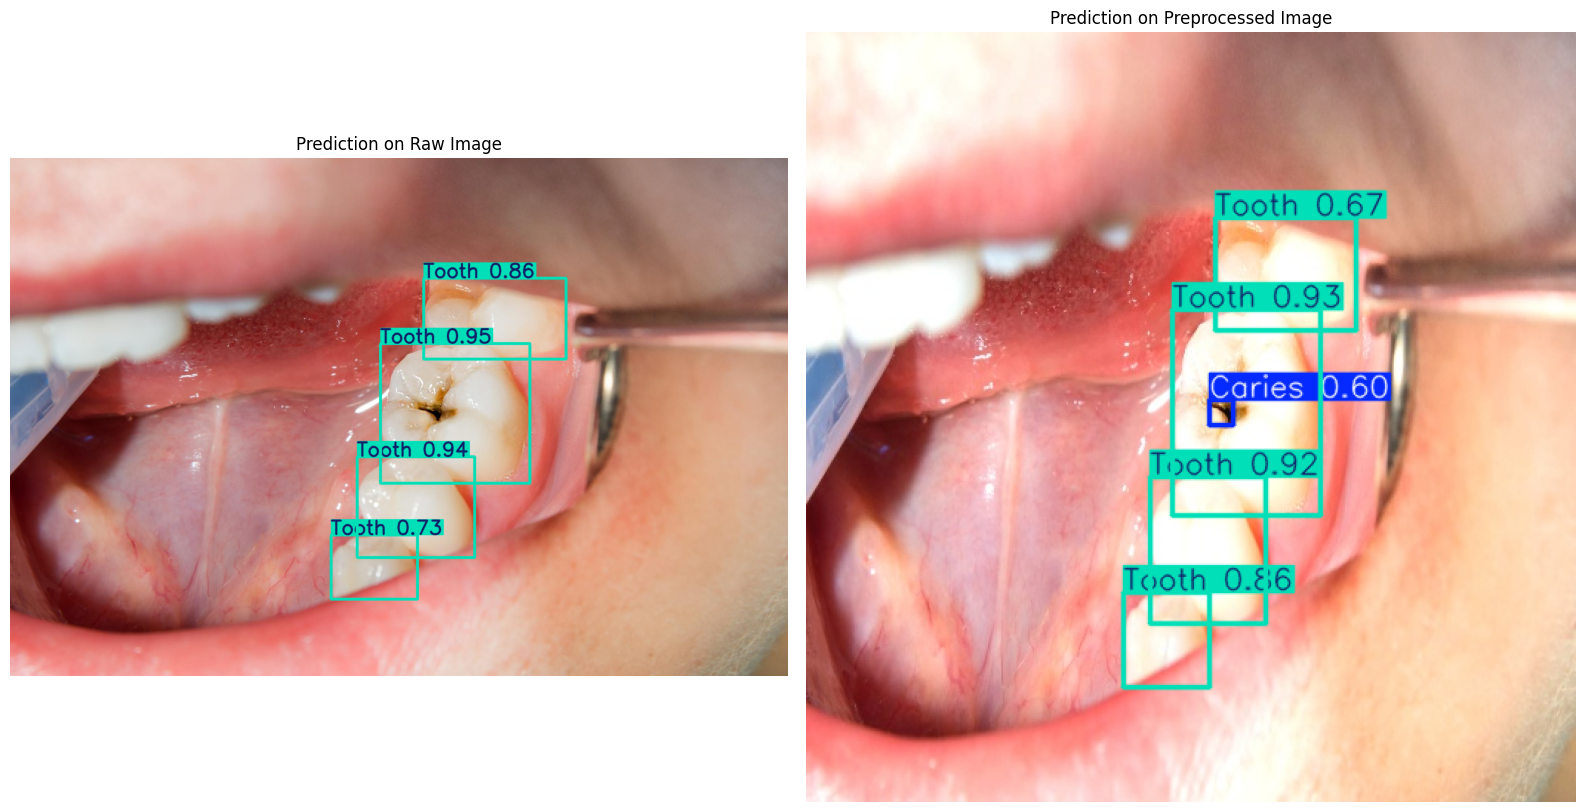

In [19]:
_plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_pred_raw, cv2.COLOR_BGR2RGB))
plt.title("Prediction on Raw Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_pred_pre, cv2.COLOR_BGR2RGB))
plt.title("Prediction on Preprocessed Image")
plt.axis('off')

plt.tight_layout()
plt.show()